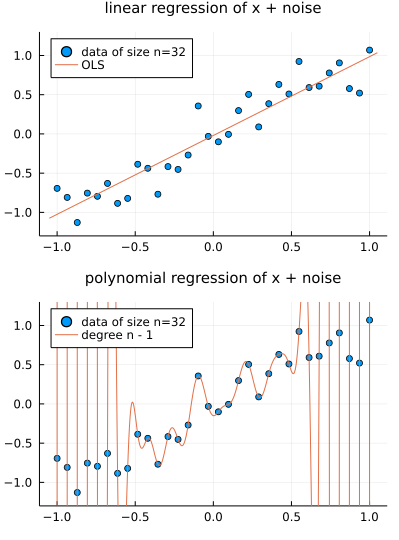

In [1]:
using Distributions, StatsPlots, Random, LinearAlgebra
default(fmt = :png, titlefontsize=10)
Random.seed!(4649373)

n = 2^5
x = range(-1, 1, n)
y = x .+ 0.2randn(n)

F(x, i, t) = prod(t - x[j] for j in eachindex(x) if j != i)
G(x, i, t) = F(x, i, t) / F(x, i, x[i])
f(x, y, t) = sum(y[i] * G(x, i, t) for i in eachindex(y))

d = 1
X = x.^(0:d)'
β = (X'X)\X'y
xs = range(-1.05, 1.05, 1000)

P1 = scatter(x, y; label="data of size n=$n")
plot!(xs, t -> evalpoly(t, β); label="OLS")
plot!(; ylim=(-1.3, 1.3), legend=:topleft)
title!("linear regression of x + noise")

P2 = scatter(x, y; label="data of size n=$n")
plot!(xs, t -> f(x, y, t); label="degree n - 1")
plot!(; ylim=(-1.3, 1.3), legend=:topleft)
title!("polynomial regression of x + noise")

plot(P1, P2; size=(400, 540), layout=(2, 1))

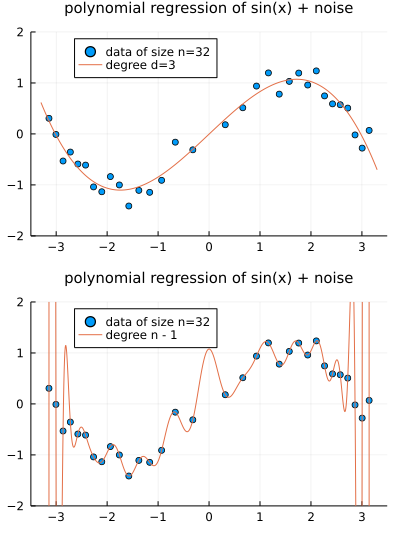

In [2]:
using Distributions, StatsPlots, Random, LinearAlgebra
default(fmt = :png, titlefontsize=10)
Random.seed!(4649373)

n = 2^5
x = π * (x -> sign(x)*abs(x)^(2/3)).(range(-1, 1, n))
y = sin.(x) .+ 0.2randn(n)

F(x, i, t) = prod(t - x[j] for j in eachindex(x) if j != i)
G(x, i, t) = F(x, i, t) / F(x, i, x[i])
f(x, y, t) = sum(y[i] * G(x, i, t) for i in eachindex(y))

d = 3
X = x.^(0:d)'
β = (X'X)\X'y
xs = range(-1.05π, 1.05π, 1000)

P1 = scatter(x, y; label="data of size n=$n")
plot!(xs, t -> evalpoly(t, β); label="degree d=$d")
plot!(; ylim = (-2, 2), legend=:top)
title!("polynomial regression of sin(x) + noise")

P2 = scatter(x, y; label="data of size n=$n")
plot!(xs, t -> f(x, y, t); label="degree n - 1")
plot!(; ylim = (-2, 2), legend=:top)
title!("polynomial regression of sin(x) + noise")

plot(P1, P2; size=(400, 540), layout=(2, 1))